In [1]:
# This notebook will contain only some NLP methods such as n-grams because the full notebook was getting too cumbersum

In [2]:
# imports
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [3]:
df_lab = pd.read_csv('Lab-Data.csv', index_col=0) # index_col stops index being read as column
df_turk = pd.read_csv('Turk-Data.csv', index_col=0)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df_lab

,button,event_type,target,time,x,y,step,turkId,file
0,1,mousedown,"[id=""alloc-slider-return-4""]>svg>g>circle",0.000000,397.0,647.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
1,1,mouseup,"[id=""alloc-slider-return-4""]>svg>g>circle",0.547000,423.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
2,1,click,"[id=""alloc-slider-return-4""]>svg>g>circle",0.547000,423.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
3,1,mousedown,"[id=""alloc-slider-return-4""]>svg>g>circle",1.176995,426.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
4,1,mousedirchange,"[id=""alloc-slider-return-4""]>svg>g>circle",1.790000,440.0,640.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
...,...,...,...,...,...,...,...,...,...
58280,1,click,"[id=""portfolio-selection""]>div:nth-child(3)>di...",275.048950,942.0,1248.0,1,ID18,study_results.all.json
58281,1,click,"[id=""portfolio-selection""]>div:nth-child(3)>di...",275.048950,942.0,1248.0,2,ID18,study_results.all.json
58282,1,click,"[id=""portfolio-selection""]>div:nth-child(3)>di...",275.048950,942.0,1248.0,3,ID18,study_results.all.json
58283,1,click,"[id=""portfolio-selection""]>div:nth-child(3)>di...",275.048950,942.0,1248.0,4,ID18,study_results.all.json


In [5]:
# Before LAB rename
df_lab['target'].value_counts()

[id="alloc-slider-return-3"]>svg                                                                            4531
[id="portfolio-selection"]>div:nth-child(1)>div>div:nth-child(1)>div:nth-child(6)>div:nth-child(2)>input    3138
[id="alloc-slider-return-1"]>svg                                                                            2544
[id="alloc-slider-return-4"]>svg                                                                            2399
[id="alloc-slider-return-2"]>svg                                                                            2294
                                                                                                            ... 
[id="investment-results"]>table>tbody                                                                          1
[id="portfolio-stats"]>svg>g>g:nth-child(1)>g:nth-child(1)>text                                                1
[id="portfolio-selection"]>div:nth-child(3)>div>div:nth-child(1)>div:nth-child(4)               

In [64]:
# RENAME LABS

# TODO Labs seem to have many more "html_other" elements than TURK. 
# Might have to rename some of the items to make them more even.

# lab target  might be 
# [id="alloc-slider-risk-4"]>svg

# So pick up on the > and rename
df_lab.loc[df_lab['target'].str.contains('>'), 'target'] = 'html_other'

df_lab.to_csv('lab-Data-renamed.csv')   # save changes

# See how there are many targets not renamed and their distributions
df_lab['target'].value_counts()

html_other               49438
alloc-slider-2            2002
alloc-slider-3            1170
alloc-slider-5             902
alloc-slider-4             788
alloc-slider-1             708
portfolio-selection        622
html                       524
alloc-slider-return-3      436
investment-results         258
alloc-slider-risk-1        233
risk-return                175
alloc-slider-return-2      165
alloc-slider-return-0      136
alloc-slider-risk-3        123
alloc-slider-return-1      103
alloc-slider-risk-0        101
saved-port-0                75
survey-container            71
saved-port-1                60
alloc-slider-risk-2         52
content                     41
alloc-slider-risk-4         35
alloc-slider-return-4       29
pretest3                    12
pretest2                     8
pretest4                     6
pretest1                     5
parsley-id-137               4
saved-port-6                 3
Name: target, dtype: int64

In [7]:
# Before TURK rename
df_turk['target'].value_counts()

alloc-slider-2                                                                                                                                                                                                                                                                             170652
alloc-slider-5                                                                                                                                                                                                                                                                             155753
alloc-slider-4                                                                                                                                                                                                                                                                             153602
html > body > main > div#content > form#portfolio-selection > div.investment-test > div.portfolio-interface.row > div.stock-select

In [8]:
# RENAME TURKS

# Turk target  might be 
# html > body > main > div#content > form#portfolio-selection
# > div.investment-test > div.portfolio-interface.row > div.stock-selection.large-7.columns 
# > div.stock-allocator.row.valign-middle > div.large-4.columns > div#alloc-slider-return-0.sparkline.narrow.return 
# > svg.chart.control > g > circle.handle
# So pick up on the > and rename
df_turk.loc[df_turk['target'].str.contains('>'), 'target'] = 'html_other'

df_turk.to_csv('turk-Data-renamed.csv')   # save changes

# See how there are many targets not renamed and their distributions
df_turk['target'].value_counts()

html_other               490349
alloc-slider-2           170652
alloc-slider-5           155753
alloc-slider-4           153602
alloc-slider-1           131002
alloc-slider-3           124736
html                      23808
portfolio-selection       15282
investment-results        12167
portfolio-stats            6039
content                    2713
risk-return                1147
alloc-slider-return-3      1040
alloc-slider-return-1       630
saved-port-0                591
alloc-slider-return-2       470
saved-port-1                445
alloc-slider-risk-1         435
alloc-slider-return-0       426
alloc-slider-risk-3         374
alloc-slider-return-4       328
alloc-slider-risk-4         287
alloc-slider-risk-0         245
alloc-slider-risk-2         201
saved-port-2                196
saved-port-3                 86
saved-port-4                 40
saved-port-5                  9
parsley-id-3644               7
saved-port-6                  6
parsley-id-2586               2
parsley-

In [9]:

def calculate_ngrams(dataframe, n):
    # TODO docstring
    # will return a dataframe of ngrams and frequency given n
    # Can take a while to compute
    
    IDs = dataframe['turkId'].unique()
    all_ngrams = []

    for ID in IDs:
        # Get targets of each user
        targets = dataframe[ dataframe['turkId'] == ID ] ['target'].to_numpy()

        ngrams_generator = nltk.ngrams(targets, n)               # creates ngram generator, can be used to find ngrams
        ngrams_distribution = nltk.FreqDist(ngrams_generator)    # nltk distribution. in form ngrams:frequency
        common_ngrams = ngrams_distribution.most_common()       # converts to list

        # append this useres ngrams to all ngrams
        # extend rather than append to iterate over list and not add a list of items as a single item.
        all_ngrams.extend(common_ngrams)

    # Convert list to dataframe
    df_ngrams = pd.DataFrame(all_ngrams, columns =['n-grams', 'Frequency'])
    df_ngrams = df_ngrams.astype(dtype= {"n-grams":"object", "Frequency":"int64"})

    # Change n-grams series from list of tuples to list of strings  # https://stackoverflow.com/questions/59993097/how-can-i-join-tuples-to-strings-in-a-pandas-dataframe
    df_ngrams['n-grams'] = df_ngrams['n-grams'].agg(' : '.join)

    # Sum the frequencies of similar ngrams.
    df_ngrams = df_ngrams.groupby(['n-grams']).sum().reset_index().sort_values(by='Frequency', ascending=False)

    # 'Normalise' the frequencies to compare lab and turk.
    # frequency of ngram divided by number of users
    df_ngrams['Relative Frequency'] = df_ngrams['Frequency'].divide(len(IDs))
    return df_ngrams.reset_index(drop=True)

# NOTE: This wont take into account outliers. 
# Say if noone touched slider 2 other than 1 user, we would still say slider 2 was very frequent event if it was only 1 user.

def visualise_ngrams(ngrams_dataframe, head_size):
# Plots bar graph showing frequency of ngrams
# Head_size determines how many unique n-grams we show
    plt.bar(ngrams_dataframe['n-grams'].head(head_size), ngrams_dataframe['Relative Frequency'].head(head_size))
    plt.xlabel("n-grams")
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
    plt.title("Lab unigrams")


In [10]:
lab_unigrams = calculate_ngrams(df_lab, 1)
print(lab_unigrams.head())
turk_unigrams = calculate_ngrams(df_turk, 1)
print(turk_unigrams.head())


n-grams  Frequency  Relative Frequency
0      html_other      49438         2746.555556
1  alloc-slider-2       2002          111.222222
2  alloc-slider-3       1170           65.000000
3  alloc-slider-5        902           50.111111
4  alloc-slider-4        788           43.777778
          n-grams  Frequency  Relative Frequency
0      html_other     490349         1063.663774
1  alloc-slider-2     170652          370.177874
2  alloc-slider-5     155753          337.859002
3  alloc-slider-4     153602          333.193059
4  alloc-slider-1     131002          284.169197


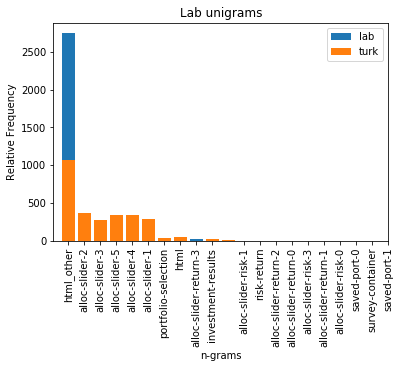

In [61]:
plt.bar(lab_unigrams['n-grams'].head(10), lab_unigrams['Relative Frequency'].head(10), label='lab')
plt.bar(turk_unigrams['n-grams'].head(10), turk_unigrams['Relative Frequency'].head(10), label='turk')

labels = df_lab['target'].value_counts()[:20]    # Get first 20 most frequent items
labels = labels.index.to_list()   # items to list

plt.xticks((labels))
plt.xlabel("n-grams")
plt.xticks(rotation=90)
plt.ylabel("Relative Frequency")
plt.title("Lab unigrams")
plt.legend(loc='best')

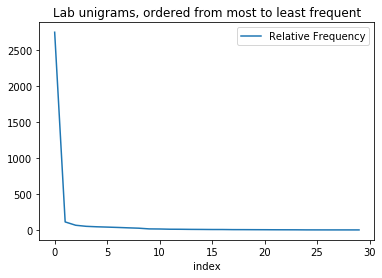

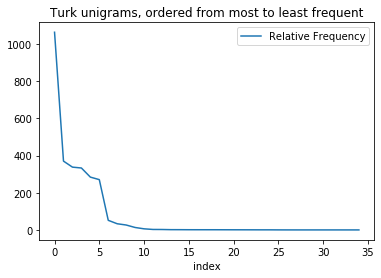

In [12]:
# These plots show the frequency of different unique n-grams in Lab and Turk data.
# I can see that anything after the 20th most frequent item contains almost no occurances so it can be removed.

lab_unigrams.reset_index().plot.line(x='index', y='Relative Frequency', title='Lab unigrams, ordered from most to least frequent')
turk_unigrams.reset_index().plot.line(x='index', y='Relative Frequency', title='Turk unigrams, ordered from most to least frequent')

,n-grams,Frequency,Relative Frequency
0,html_other,49438,2746.555556
1,alloc-slider-2,2002,111.222222
2,alloc-slider-3,1170,65.000000
3,alloc-slider-5,902,50.111111
4,alloc-slider-4,788,43.777778
5,alloc-slider-1,708,39.333333
6,portfolio-selection,622,34.555556
7,html,524,29.111111
8,alloc-slider-return-3,436,24.222222
9,investment-results,258,14.333333


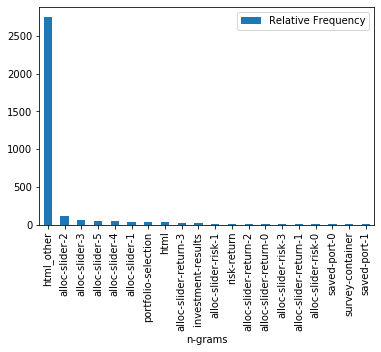

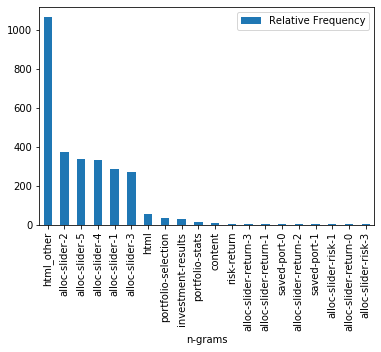

In [13]:
lab_unigrams.head(20).plot.bar(x='n-grams', y='Relative Frequency')
turk_unigrams.head(20).plot.bar(x='n-grams', y='Relative Frequency')

# Create these plots but with a breakdown in each column showing what ID it came from.
# This will help us identidy any outliers, and remove them if they are skewing the resutls.
# TODO create a stacked bar chart in tableau by adding column to n-grams dataframe of ID.

lab_unigrams

Now we've done some exploration into unigrams, lets look at tri-grams to see if theres anything interesting going on.


In [15]:
lab_trigrams = calculate_ngrams(df_lab, 3)
turk_trigrams = calculate_ngrams(df_turk, 3)

print(lab_trigrams.head())
print(turk_trigrams.head())

n-grams  Frequency  \
0              html_other : html_other : html_other      48354   
1  alloc-slider-2 : alloc-slider-2 : alloc-slider-2       1930   
2  alloc-slider-3 : alloc-slider-3 : alloc-slider-3       1114   
3  alloc-slider-5 : alloc-slider-5 : alloc-slider-5        866   
4  alloc-slider-4 : alloc-slider-4 : alloc-slider-4        740   

   Relative Frequency  
0         2686.333333  
1          107.222222  
2           61.888889  
3           48.111111  
4           41.111111  
                                            n-grams  Frequency  \
0              html_other : html_other : html_other     462784   
1  alloc-slider-2 : alloc-slider-2 : alloc-slider-2     159964   
2  alloc-slider-5 : alloc-slider-5 : alloc-slider-5     147588   
3  alloc-slider-4 : alloc-slider-4 : alloc-slider-4     143699   
4  alloc-slider-1 : alloc-slider-1 : alloc-slider-1     123584   

   Relative Frequency  
0         1003.869848  
1          346.993492  
2          320.147505  
3         

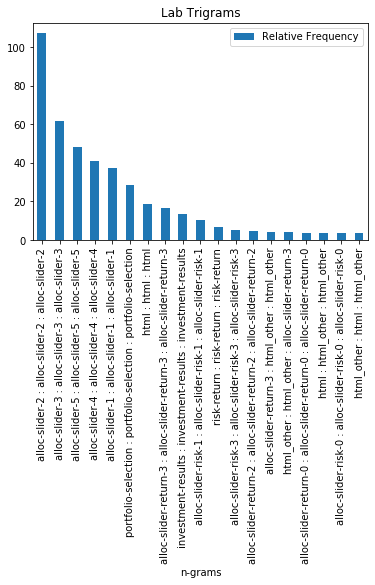

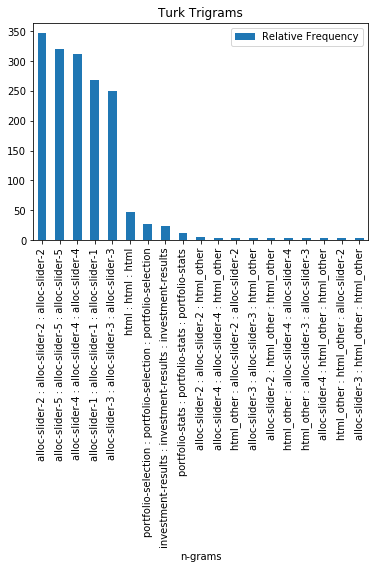

In [65]:
#[1:20] hides the first result which is much more frequent and hides everything else
lab_trigrams[1:20].plot.bar(x='n-grams', y='Relative Frequency', title='Lab Trigrams')
turk_trigrams[1:20].plot.bar(x='n-grams', y='Relative Frequency', title='Turk Trigrams')

In [17]:
turk_trigrams

,n-grams,Frequency,Relative Frequency
0,html_other : html_other : html_other,462784,1003.869848
1,alloc-slider-2 : alloc-slider-2 : alloc-slider-2,159964,346.993492
2,alloc-slider-5 : alloc-slider-5 : alloc-slider-5,147588,320.147505
3,alloc-slider-4 : alloc-slider-4 : alloc-slider-4,143699,311.711497
4,alloc-slider-1 : alloc-slider-1 : alloc-slider-1,123584,268.078091
...,...,...,...
767,html_other : alloc-slider-risk-3 : alloc-slide...,1,0.002169
768,alloc-slider-3 : content : content,1,0.002169
769,alloc-slider-3 : html : alloc-slider-2,1,0.002169
770,alloc-slider-3 : html : alloc-slider-4,1,0.002169


Maybe bi-grams will be better to use

n-grams  Frequency  Relative Frequency
0          html_other : html_other      48859         2714.388889
1  alloc-slider-2 : alloc-slider-2       1966          109.222222
2  alloc-slider-3 : alloc-slider-3       1142           63.444444
3  alloc-slider-5 : alloc-slider-5        884           49.111111
4  alloc-slider-4 : alloc-slider-4        764           42.444444
                           n-grams  Frequency  Relative Frequency
0          html_other : html_other     475641         1031.759219
1  alloc-slider-2 : alloc-slider-2     165202          358.355748
2  alloc-slider-5 : alloc-slider-5     151582          328.811280
3  alloc-slider-4 : alloc-slider-4     148537          322.206074
4  alloc-slider-1 : alloc-slider-1     127247          276.023861


,n-grams,Frequency,Relative Frequency
0,html_other : html_other,475641,1031.759219
1,alloc-slider-2 : alloc-slider-2,165202,358.355748
2,alloc-slider-5 : alloc-slider-5,151582,328.811280
3,alloc-slider-4 : alloc-slider-4,148537,322.206074
4,alloc-slider-1 : alloc-slider-1,127247,276.023861
...,...,...,...
249,alloc-slider-return-0 : alloc-slider-return-1,1,0.002169
250,alloc-slider-return-1 : alloc-slider-return-0,1,0.002169
251,alloc-slider-return-1 : alloc-slider-return-2,1,0.002169
252,portfolio-stats : alloc-slider-return-4,1,0.002169


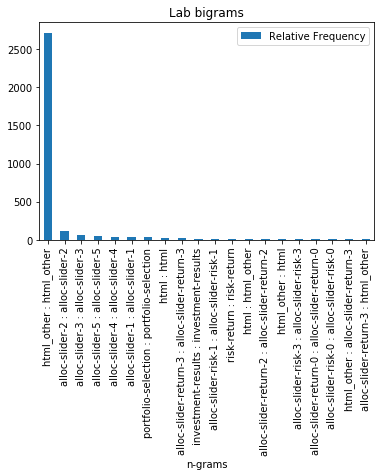

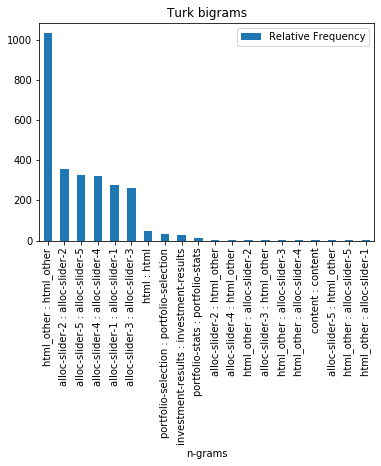

In [18]:
lab_bigrams = calculate_ngrams(df_lab, 2)
turk_bigrams = calculate_ngrams(df_turk, 2)

print(lab_bigrams.head())
print(turk_bigrams.head())

lab_bigrams.head(20).plot.bar(x='n-grams', y='Relative Frequency', title='Lab bigrams')
turk_bigrams.head(20).plot.bar(x='n-grams', y='Relative Frequency', title='Turk bigrams')

turk_bigrams

(<matplotlib.axes._subplots.AxesSubplot at 0x1c33478efc8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c334999548>)

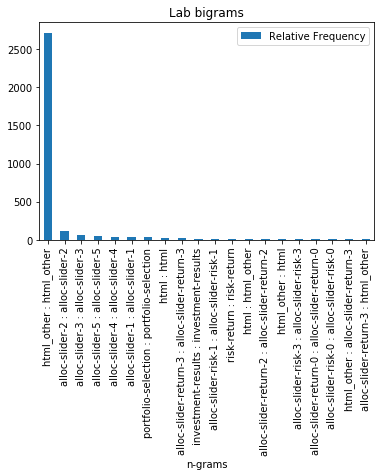

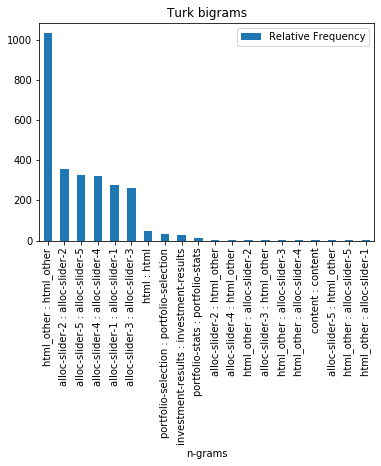

In [19]:
lab_bigrams.head(20).plot.bar(x='n-grams', y='Relative Frequency', title='Lab bigrams'),turk_bigrams.head(20).plot.bar(x='n-grams', y='Relative Frequency', title='Turk bigrams')

In [26]:

# Here they suggest bayes filtering can be used to detect language, maybe I use too?
# https://stackoverflow.com/questions/101569/algorithm-to-detect-similar-documents-in-python-script

# Another idea from SPAM detection is using a naive bayes, here they get the count of each word for each email and bayes it.
# Could even use this to get the counts of 2/3-grams to compare?
# https://towardsdatascience.com/spam-filtering-using-naive-bayes-98a341224038

# TODO: I think for any of these to be used we would have to properly rename all the mouse items so they match

In [259]:
#TODO: https://medium.com/@a.ydobon/justforfunpython-n-gram-to-quantify-similarity-between-sentences-2d61e68a478c
# Use this method to compare one users targets with the rest of their class to get a similarity.
# Then can get the average similarity compared to the group of each target.
# Then compare similarity to other group e.g. how similar is this turk to a lab person.
# If any turk matches lab more then we boldly assume it belongs in the wrong class.

# funt compare turks
def compare_users(dataframe, userIDa, userIDb, n):
    # TODO: Docsting
    #compares two users given ID and what length n-grams to use.
    # Will return a single number, similarity from 0 to 1.

    a = dataframe[ dataframe['turkId'] == userIDa ] ['target'].to_numpy()
    b = dataframe[ dataframe['turkId'] == userIDb ] ['target'].to_numpy()

    ngrams_generator_a = nltk.ngrams(a, n)               # creates ngram generator, can be used to find ngrams
    ngrams_generator_b = nltk.ngrams(b, n)               # creates ngram generator, can be used to find ngrams

    common = []
    similar_count = 0
    ngrams_a_count = 0
    ngrams_b_count = 0

    # Go through each ngram in a, see if it matches any ngrams in b
    # Return similarity and list of similar ngrams
    for gram_a in ngrams_generator_a:
        ngrams_a_count += 1 # To count how many ngrams are in a

        for gram_b in ngrams_generator_b:
            ngrams_b_count += 1
            if gram_a == gram_b:
                #print('MATCH')
                similar_count += 1
                common.append(gram_a)

    similarity = similar_count/ngrams_a_count
    return similarity, common

sim, _ = compare_users(df_lab, 'ID1', 'ID3', 2)
sim

1.1318069306930694

In [187]:
def compare_all(dataframe, n):
    IDs = dataframe['turkId'].unique()

    # First get a list of all the ngrams for each user in the dataframe
    users_ngrams_list = []

    for ID in IDs:
        targets = dataframe[ dataframe['turkId'] == ID ] ['target'].to_numpy()

        ngrams_generator = nltk.ngrams(targets, n)  # creates ngram generator, can be used to find ngrams
        ngrams_list = list(ngrams_generator)        # generator to list
        
        users_ngrams_list.append(ngrams_list)

    #users_ngrams_list # this is a list of lists. index 0 has a list of ngrams from the first user ID.


    # FIrst enumerates, a and b are essesnally a list of the unique users that we go through.
    # After that loop we index into the list, which contains a list of the ngrams of the user with that index
    # e.g. index 0 stores the ngrams about the first user at IDs[0]

    resutls = []    # results should end up being same length as num of IDs

    for index_a, ngrams_list_a in enumerate(users_ngrams_list):
        print(f'On {index_a} out of {len(IDs)}')

        total_similarity = 0
        for index_b, ngrams_list_b in enumerate(users_ngrams_list):
            # compare list index_a's ngrams with list index_b's

            # we dont want to compare a list to itself for similarity
            if index_a != index_b:
                total_similarity += lists_similarity(ngrams_list_a, ngrams_list_b)

        print('total_similarity', total_similarity)
        similarity_average = total_similarity/len(IDs)
        print(f'{index_a} average similarity : {similarity_average}')
        resutls.append(similarity_average)

        print('similarity_average', similarity_average)

    return pd.DataFrame( {'ID': IDs, 'Similarity': resutls} )

lab_sim = compare_all(df_lab, 2)
#turk_sim = compare_all(df_turk, 2) # start time 15:36

On 0 out of 18
total_similarity 42730.1646039604
0 average similarity : 2373.8980335533556
similarity_average 2373.8980335533556
On 1 out of 18


KeyboardInterrupt: 

In [260]:
def compare_all(dataframe, n):
  IDs = dataframe['turkId'].unique()
  similar_list = []

  num_IDs = len(IDs)
  ID_num = 0

  for ID_a in IDs:

    ID_num += 1

    print(f'ID:{ID_num} out of {num_IDs}')

    now = datetime.now()

    current_time = now.strftime("%H:%M:%S")
    print("Current Time =", current_time)

    total_similarity = 0

    for ID_b in IDs:
      similarity = compare_users(dataframe, ID_a, ID_b, n)
      total_similarity += similarity

      #print(f'{ID_a}, {ID_b} : {similarity}')

      similarity_average = total_similarity/len(IDs)
      #print(f'{ID_a} average similarity : {similarity_average}')
      similar_list.append(similarity_average)

  return pd.DataFrame( {'ID': IDs, 'Similarity': similar_list} )

In [160]:
turk_sim

,ID,Similarity
0,A35YFAFWP33C70,0.426621
1,A33XI8ZN4NZ0SQ,0.369510
2,A1ZG7VYH0DUEXW,0.192485
3,A1RXG8RE0SJ4LC,0.910644
4,AUDH0P4ZHJKS2,3.485673
...,...,...
456,A18TCR555RWUZV,2.462433
457,A11LUY287K2MYF,0.062962
458,A9KLWB70I12U7,0.087079
459,AMG9Y1YLBTKIV,0.369510


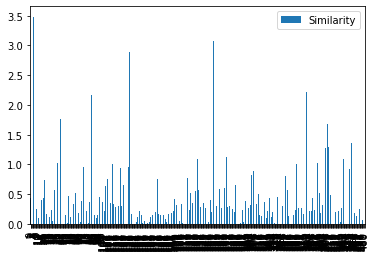

In [263]:
turk_sim.to_csv('turk_sim.csv') # Save as this took AGES to run
turk_sim.plot(kind='bar')